In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cars = pd.read_csv('data/car_prices.csv', on_bad_lines='skip')

In [3]:
cars.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


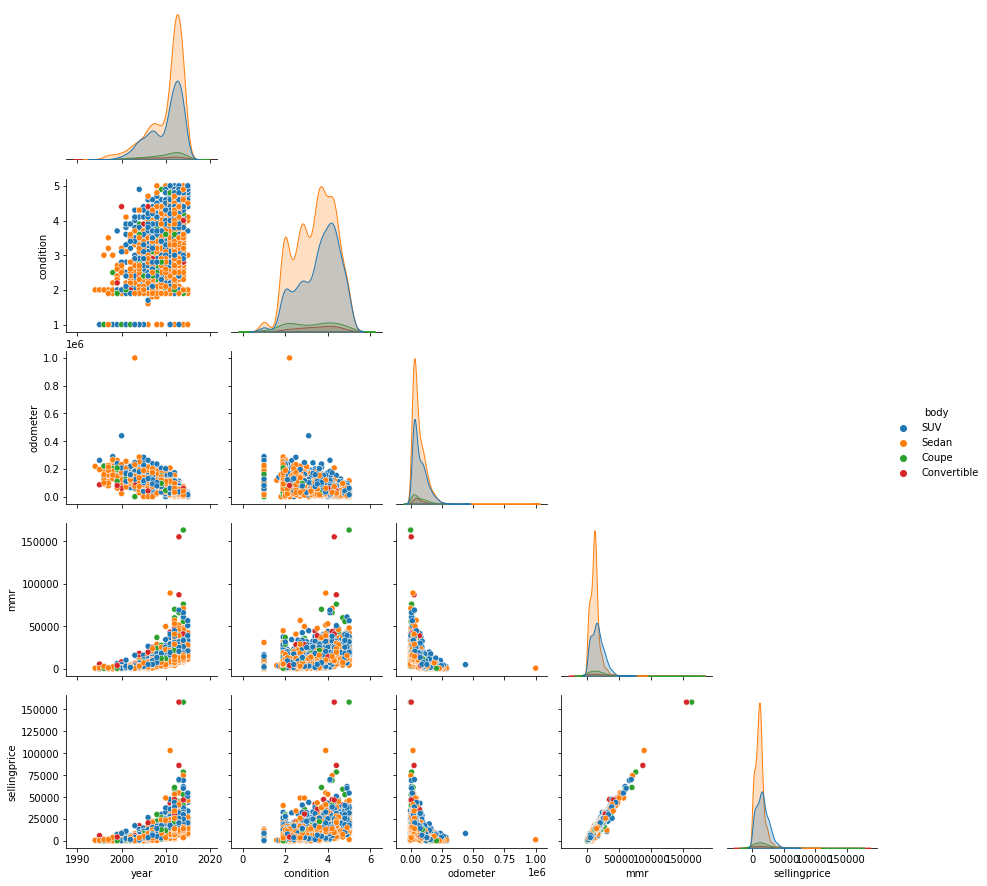

In [4]:
style_list = ['SUV', 'Sedan', 'Convertible', 'Coupe']

sns.pairplot(
    cars.query('body in @style_list').sample(3000),
    corner=True,
    hue='body'
)

<AxesSubplot:>

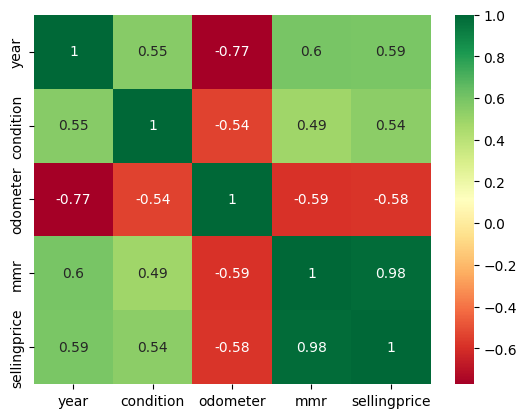

In [5]:
sns.heatmap(
    cars.corr(),
    cmap = 'RdYlGn',
    annot=True
)

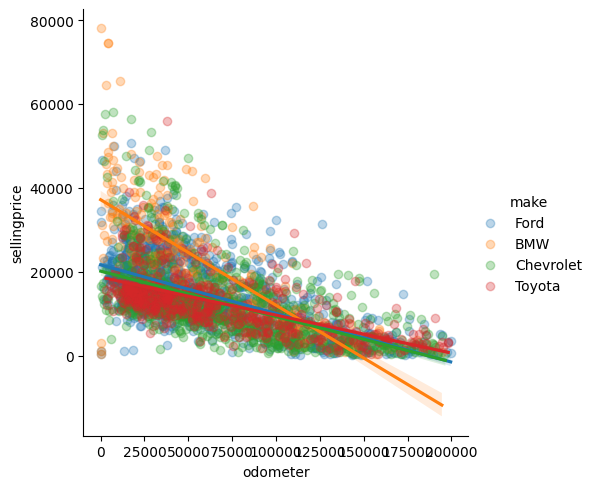

In [5]:
brand_list = ['Ford', 'BMW', 'Toyota', 'Chevrolet']

sns.lmplot(
    x = 'odometer',
    y = 'sellingprice',
    data = cars.query('make in @brand_list and sellingprice < 150000 and odometer < 200_000').sample(3000),
    hue = 'make',
    scatter_kws=({'alpha': 0.3})
)

In [7]:
import scipy.stats as stats

cars_reg = cars.dropna()

stats.linregress(x = cars_reg['odometer'], y = cars_reg['sellingprice'])

LinregressResult(slope=-0.10686305954841516, intercept=20818.28408595647, rvalue=-0.5773849819198604, pvalue=0.0, stderr=0.00021987650761310986, intercept_stderr=18.58796228286367)

In [8]:
for brand in brand_list:
    data = cars_reg.loc[cars_reg['make'] == brand]
    print(f"{brand}: {stats.linregress(data['odometer'], data['sellingprice'])[0:2]}")

Ford: (-0.09953734771818873, 20840.011075886512)
BMW: (-0.2225033042967633, 35567.979744684795)
Toyota: (-0.07594777614361674, 17813.017107685304)
Chevrolet: (-0.08841045962774952, 18705.587357485056)


# Categorical Relationships

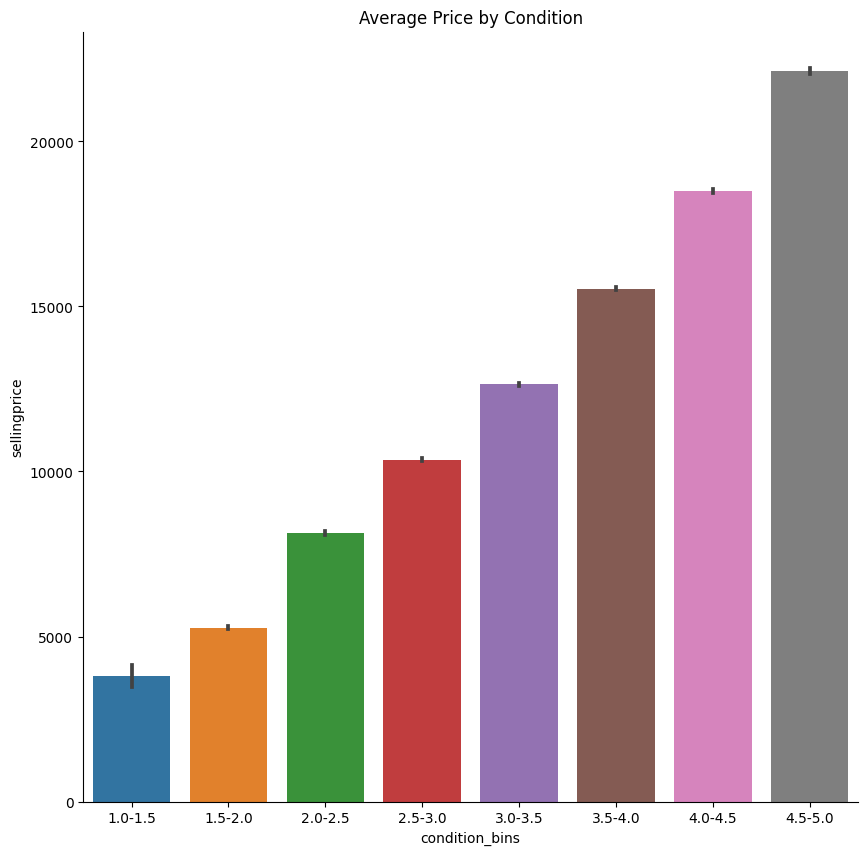

In [26]:
fig, ax = plt.subplots(figsize = (10, 10))

bins = np.linspace(1, 5, 9)
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]

cars['condition_bins'] = pd.cut(cars['condition'], bins = bins, labels=labels)

sns.barplot(
    data = cars,
    x = 'condition_bins',
    y = 'sellingprice'
)

ax.set_title("Average Price by Condition")

sns.despine()


# Price by maker and condition

In [28]:
top10 = cars['make'].value_counts().iloc[:10].index

avgs = (
    cars
    .loc[cars['make'].isin(top10)]
    .pivot_table(index = 'make',
                 columns = 'condition_bins',
                 values = {'sellingprice':'mean'})
    .droplevel(0, axis = 1)
)

avgs.head()

condition_bins,1.0-1.5,1.5-2.0,2.0-2.5,2.5-3.0,3.0-3.5,3.5-4.0,4.0-4.5,4.5-5.0
make,,,,,,,,
BMW,4326.923077,6848.680865,10478.320029,12795.277669,16397.610281,21911.286118,28791.890310,35902.992693
Chevrolet,3021.031746,5384.030601,7425.967945,10325.668781,11622.675195,14436.514288,16733.687841,21580.124553
Chrysler,2354.545455,4301.224656,5367.031437,9077.602013,9247.621069,14813.315207,15212.500990,18388.446281
Dodge,4094.907407,5299.306603,7127.988641,9840.543230,10517.710952,14051.693213,14893.500000,18400.000000
Ford,4175.866667,5282.734146,8550.886379,10954.656807,13394.647490,15374.553012,17820.920366,20810.886556


<AxesSubplot:title={'center':'Avg Selling Price by Make and Quality'}, xlabel='condition_bins', ylabel='make'>

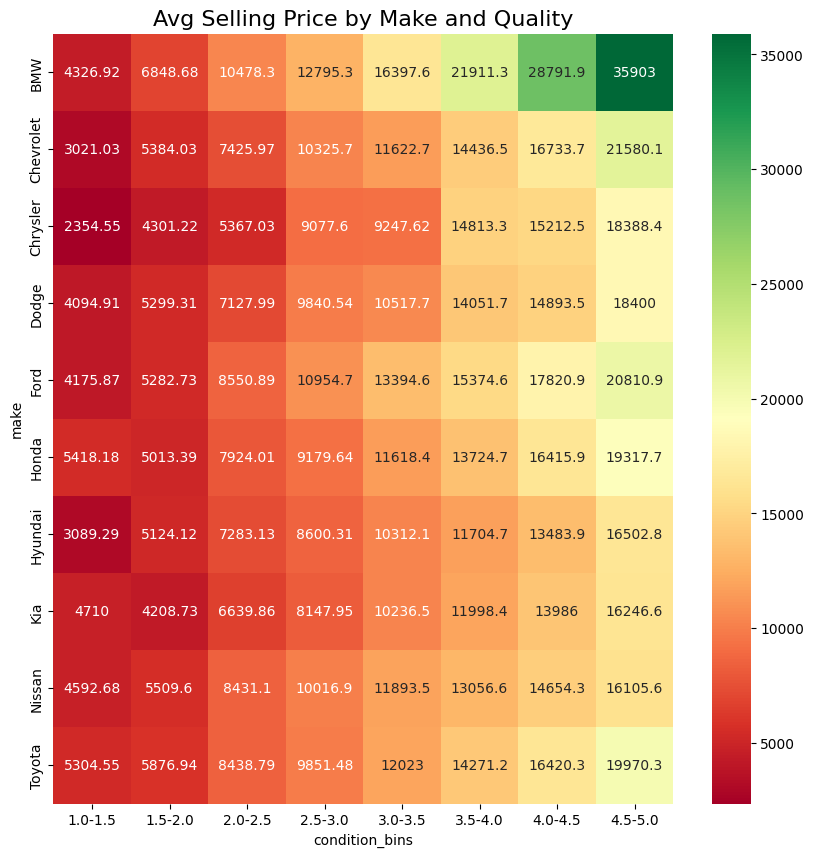

In [29]:
fig, axis = plt.subplots(figsize = (10, 10))

plt.title("Avg Selling Price by Make and Quality", fontsize = 16)

sns.heatmap(
    avgs,
    annot = True,
    cmap = 'RdYlGn',
    fmt = 'g'
)

# F150 deep dive

In [30]:
f150s = cars[cars['model'] == 'F-150']

f150s.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,contition_bins,condition_bins
983,2012,Ford,F-150,XLT,SuperCrew,NaN,1ftew1cm9ckd05952,ca,4.6,51189.0,gray,gray,"ford motor credit company,llc pd",19700,20200,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5.0,4.5-5.0
1013,2012,Ford,F-150,FX2,SuperCrew,automatic,1ftfw1ct0cfb64807,ca,4.6,28687.0,gray,black,"ford motor credit company,llc pd",26700,30500,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.5-5.0,4.5-5.0
1052,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et3ckd61619,ca,3.9,27465.0,black,gray,"ford motor credit company,llc pd",26300,28800,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),3.5-4.0,3.5-4.0
1054,2012,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1ef9cfc79834,ca,3.5,93858.0,white,gray,aaero sweet company,18900,19500,Wed Dec 17 2014 12:15:00 GMT-0800 (PST),3.0-3.5,3.0-3.5
1074,2012,Ford,F-150,Lariat,SuperCab,automatic,1ftfx1ef6cfc80260,ca,4.1,46444.0,red,black,"ford motor credit company,llc pd",26300,25600,Thu Dec 18 2014 12:00:00 GMT-0800 (PST),4.0-4.5,4.0-4.5


<AxesSubplot:xlabel='sellingprice', ylabel='Count'>

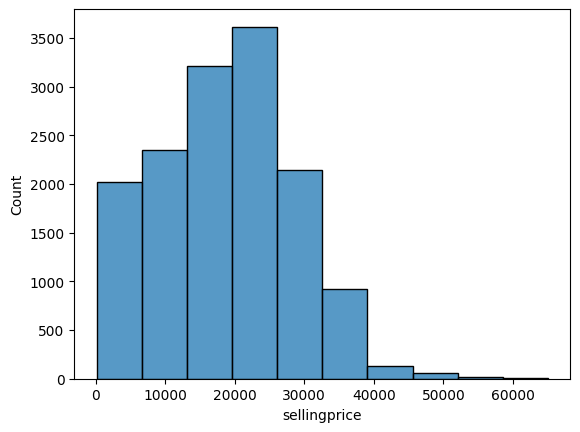

In [31]:
sns.histplot(
    x = 'sellingprice',
    bins = 10,
    data = f150s
)

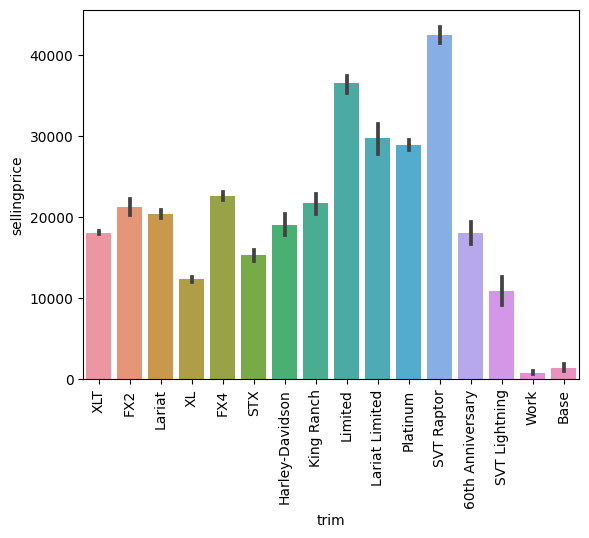

In [32]:
fig, ax = plt.subplots()

sns.barplot(x = 'trim', y = 'sellingprice', data = f150s)

plt.xticks(rotation = 90)

plt.show()

In [33]:
f150s_reduced = f150s.query('trim in ["XL", "XLT", "Platinum", "SVT Raptor"]')

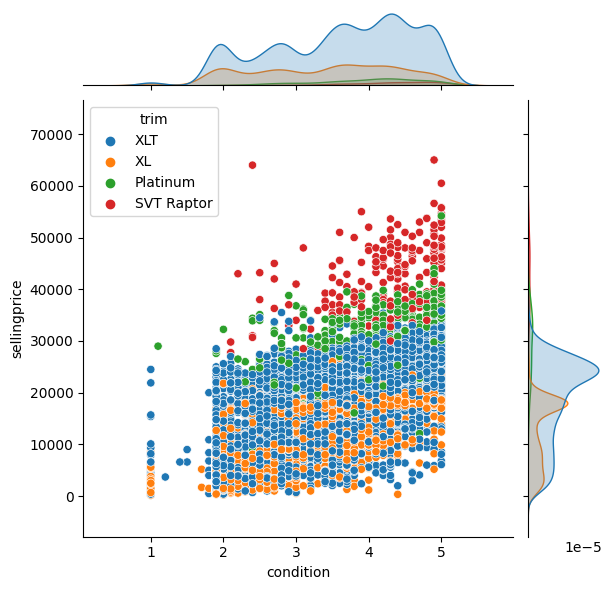

In [34]:
sns.jointplot(
    x =  'condition',
    y = 'sellingprice',
    kind = 'scatter',
    data = f150s_reduced,
    hue = 'trim'
)

# Deals

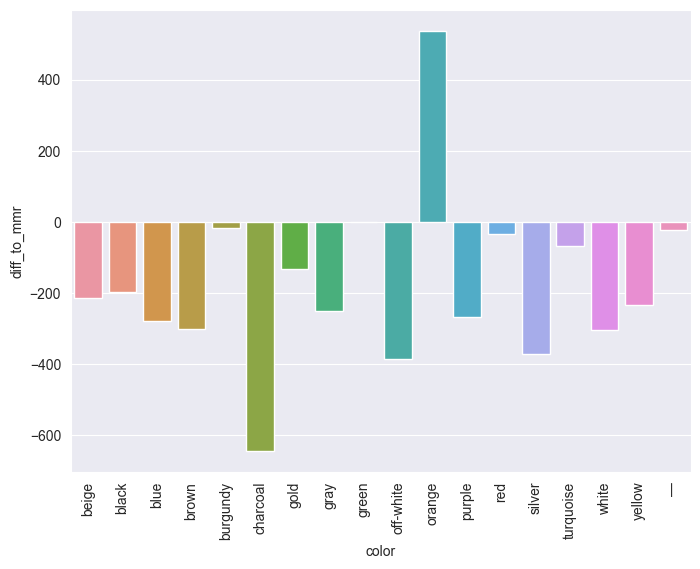

In [36]:
sns.set_style('darkgrid')

f150s = (
    f150s
    .assign(diff_to_mmr = f150s['sellingprice'] - f150s['mmr'])
)

f150s_by_color = (
    f150s
    .groupby('color', as_index = False)
    .agg({'diff_to_mmr':'mean'})
)

fig, ax = plt.subplots(figsize = (8, 6))

sns.barplot(
    x = 'color',
    y = 'diff_to_mmr',
    data = f150s_by_color
)

plt.xticks(rotation = 90)

plt.show()

In [38]:
trim_list = ['XL', 'XLT', 'Platinum', 'SVT Raptor']

f150s_reduced = f150s.query('color != "orange" and trim in @trim_list')

f150s_pivot = (
    f150s_reduced
    .loc[f150s_reduced['year'].between(2009, 2014)]
    .pivot_table(
        index = 'trim',
        columns = 'condition_bins',
        values = {'sellingprice':'mean'}
    )
)

<AxesSubplot:xlabel='None-condition_bins', ylabel='trim'>

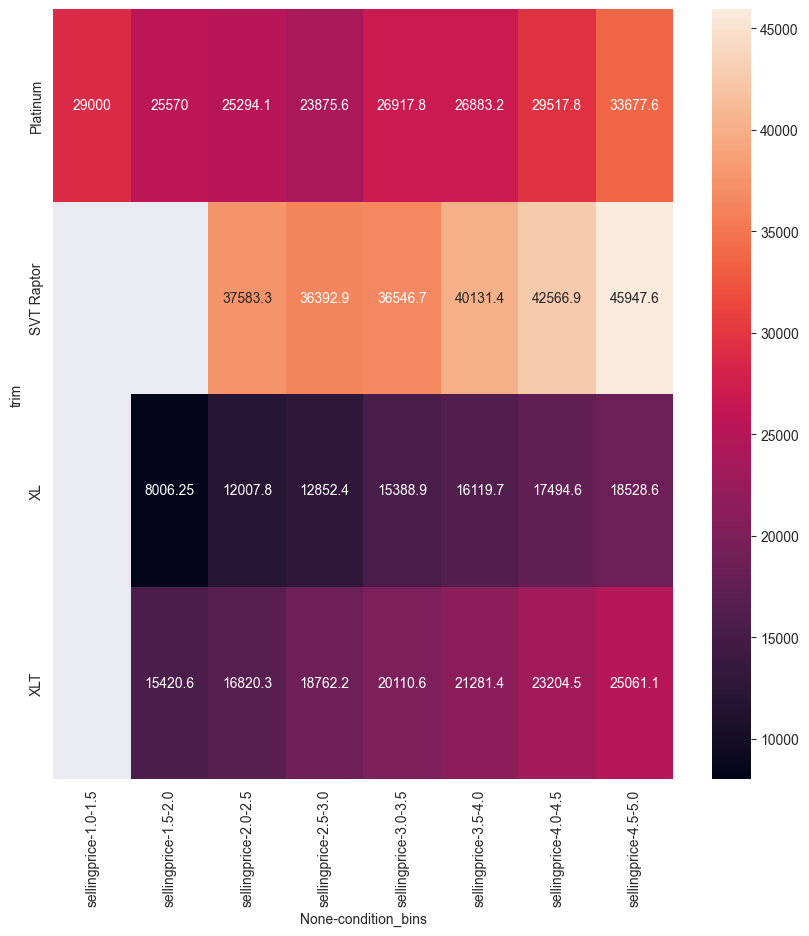

In [39]:
fig, ax =plt.subplots(figsize = (10, 10))

sns.heatmap(f150s_pivot, annot=True, fmt = 'g')

# Where to buy trucks

<AxesSubplot:xlabel='state', ylabel='auto_count'>

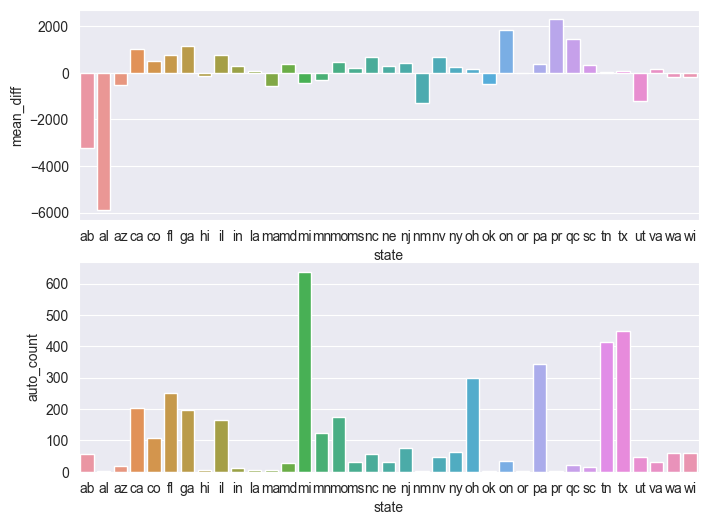

In [41]:
f150s_xlt = (
    f150s_reduced
    .query("trim == 'XLT' and condition >= 3.5")
    .groupby(['state'], as_index=False)
    .agg(
        mean_diff = ('diff_to_mmr', 'mean'),
        auto_count = ('diff_to_mmr', 'count')
    )
)

fig, ax = plt.subplots(2, figsize = (8,6))

sns.barplot(
    x = 'state',
    y = 'mean_diff',
    data = f150s_xlt,
    ax = ax[0]
)

sns.barplot(
    x = 'state',
    y = 'auto_count',
    data = f150s_xlt,
    ax = ax[1]
)